In [ ]:

#데이터 로드 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olympic = pd.read_csv('/content/olympics_dataset.csv')

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', None)


# **2. EDA(데이터 구조 파악 및 결측치 확인)**

In [ ]:
# 데이터 개수 및 feature 개수 확인
olympic.shape

(252565, 11)

In [ ]:
#데이터 구조 확인
#수치형 데이터는 년도뿐이고, 나머지는 다 범주형 데이터에 속함
#또한 결측된 데이터는 존재하지 않음을 알 수 있음
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [ ]:
# 상위 5개 데이터를 통해 데이터 확인
olympic.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [ ]:
# 범주형 데이터 컬럼 확인 및 전처리

print(len(olympic['NOC'].unique()))

234


In [ ]:
print(len(olympic['City'].unique()))
print(len(olympic['Sport'].unique()))
print(len(olympic['Medal'].unique()))

23
76
4


# **3. 전처리**

In [ ]:
#고유 데이터를 포함하는 컬럼 및 중복 컬럼 제거
unique_drop_columns = ['player_id','Name','Sex','Team', 'Season', 'City']
olympic_cleaned = olympic.drop(columns = unique_drop_columns)

print(olympic_cleaned.shape)

(252565, 5)


In [ ]:
changed_deleted_noc = pd.read_csv('/content/change_deleted_noc.csv')
changed_deleted_noc.info()

deleted = changed_deleted_noc['deleted'].unique()
before  = changed_deleted_noc['before'].unique()
after = changed_deleted_noc['after'].unique()

print(deleted)
print(before)
print(after)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   deleted  17 non-null     object
 1   before   13 non-null     object
 2   after    13 non-null     object
dtypes: object(3)
memory usage: 536.0+ bytes
['EUN' 'TCH' 'AHO' 'ANZ' 'SCG' 'IOA' 'YUG' 'ROT' 'CRT' 'SAA' 'BOH' 'WIF'
 'UNK' 'NFL' 'EOR' 'AIN' 'UAR']
['URS' 'KUW' 'LIB' 'YAR' 'GDR' 'FRG' 'YMD' 'MAL' 'RHO' 'NBO' 'VNM' 'ROC'
 'VET' nan]
['RUS' 'KWT' 'LBN' 'YEM' 'GER' 'MAS' 'ZIM' 'VIE' 'TPE' nan]


In [ ]:
#바뀐 국가들을 현재 있는 코드들로 통합
dict_noc = {'URS':'RUS', 'KUW':'KWT', 'LIB':'LBN',
            'YAR':'YEM', 'GDR':'GER', 'FRG':'GER',
            'MAL':'MAS', 'RHO':'ZIM', 'NBO':'MAS',
            'VNM':'VIE', 'VET':'VIE', 'ROC':'TPE', 'YMD':'YEM'}

for item in dict_noc:
    mask = olympic_cleaned['NOC'] == item
    # 일치하는 행을 'item'으로 변경
    olympic_cleaned.loc[mask, 'NOC'] = dict_noc[item]
    print(item, ' -> ', dict_noc)

URS  ->  {'URS': 'RUS', 'KUW': 'KWT', 'LIB': 'LBN', 'YAR': 'YEM', 'GDR': 'GER', 'FRG': 'GER', 'MAL': 'MAS', 'RHO': 'ZIM', 'NBO': 'MAS', 'VNM': 'VIE', 'VET': 'VIE', 'ROC': 'TPE', 'YMD': 'YEM'}
KUW  ->  {'URS': 'RUS', 'KUW': 'KWT', 'LIB': 'LBN', 'YAR': 'YEM', 'GDR': 'GER', 'FRG': 'GER', 'MAL': 'MAS', 'RHO': 'ZIM', 'NBO': 'MAS', 'VNM': 'VIE', 'VET': 'VIE', 'ROC': 'TPE', 'YMD': 'YEM'}
LIB  ->  {'URS': 'RUS', 'KUW': 'KWT', 'LIB': 'LBN', 'YAR': 'YEM', 'GDR': 'GER', 'FRG': 'GER', 'MAL': 'MAS', 'RHO': 'ZIM', 'NBO': 'MAS', 'VNM': 'VIE', 'VET': 'VIE', 'ROC': 'TPE', 'YMD': 'YEM'}
YAR  ->  {'URS': 'RUS', 'KUW': 'KWT', 'LIB': 'LBN', 'YAR': 'YEM', 'GDR': 'GER', 'FRG': 'GER', 'MAL': 'MAS', 'RHO': 'ZIM', 'NBO': 'MAS', 'VNM': 'VIE', 'VET': 'VIE', 'ROC': 'TPE', 'YMD': 'YEM'}
GDR  ->  {'URS': 'RUS', 'KUW': 'KWT', 'LIB': 'LBN', 'YAR': 'YEM', 'GDR': 'GER', 'FRG': 'GER', 'MAL': 'MAS', 'RHO': 'ZIM', 'NBO': 'MAS', 'VNM': 'VIE', 'VET': 'VIE', 'ROC': 'TPE', 'YMD': 'YEM'}
FRG  ->  {'URS': 'RUS', 'KUW': 'KWT', 'L

In [ ]:
#분리되거나, 국가가 아닌 컬럼 삭제
drop_column_values = ['EUN', 'TCH', 'AHO',
                      'ANZ', 'SCG', 'IOA',
                      'YUG', 'CRT', 'SAA',
                      'BOH', 'WIF', 'UNK',
                      'NFL', 'EOR', 'AIN',
                      'ROT','UAR']

olympic_cleaned = olympic_cleaned[~olympic_cleaned['NOC'].isin(drop_column_values)]

In [ ]:
print(olympic_cleaned.shape)
print(len(olympic_cleaned['NOC'].unique()))

(245407, 5)
206


In [ ]:
olympic_cleaned.drop_duplicates(subset=['NOC', 'Year', 'Sport', 'Event', 'Medal'],
			            keep='first', inplace=True)

In [ ]:
# 국가 코드, 년도별로 금, 은, 동의 획득 수를 집계
olympic_cleaned = olympic_cleaned.pivot_table(index=['NOC', 'Year'], columns='Medal', aggfunc='size', fill_value=0)

# Gold, Silver, Bronze 외의 컬럼을 0으로 대체
medal_columns = ['Gold', 'Silver', 'Bronze']  # 금, 은, 동만 남기기
for col in olympic_cleaned.columns:
    if col not in medal_columns:
        olympic_cleaned[col] = 0

# 원하는 컬럼만 남기기
olympic_cleaned = olympic_cleaned[['Gold', 'Silver', 'Bronze']]

# 컬럼 이름을 단순화
olympic_cleaned.columns.name = None

olympic_cleaned = olympic_cleaned.reset_index()

In [ ]:
max_value_row = olympic_cleaned[olympic_cleaned['Gold'] == olympic_cleaned['Gold'].max()]
print(max_value_row)

      NOC  Year  Gold  Silver  Bronze
3027  USA  1984    82      61      30


In [ ]:
print(olympic_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     3145 non-null   object
 1   Year    3145 non-null   int64 
 2   Gold    3145 non-null   int64 
 3   Silver  3145 non-null   int64 
 4   Bronze  3145 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 123.0+ KB
None


# **3. 모델 학습 및 예측**

In [ ]:
def sliding_windows_by_country(data, seq_length):
    x = []
    y = []

    # 국가별로 데이터를 그룹화
    grouped_data = data.groupby('NOC')

    for country, group in grouped_data:
        # 메달 데이터를 선택하여 numpy 배열로 변환
        medal_data = group[['Gold', 'Silver', 'Bronze']].values

        # 슬라이딩 윈도우 적용
        for i in range(len(medal_data) - seq_length):
            _x = medal_data[i:i+seq_length]  # 입력 시퀀스
            _y = medal_data[i+seq_length]    # 예측 대상 (다음 시점)
            x.append(_x)
            y.append(_y)

    return np.array(x), np.array(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)

olympics = olympic_cleaned

#슬라이딩 윈도우 적용
seq_length = 3
num_epochs = 3500
learning_rate = 0.01

input_size = 3
hidden_size = 6
num_layers = 6
num_classes = 3

x, y = sliding_windows_by_country(olympic_cleaned, seq_length)

Device: cpu
82 82


In [ ]:
# fix random seed for reproducibility
torch.manual_seed(7)

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        # LSTM 모델 정의 (batch_first=True로 배치 차원을 첫 번째로)
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        # Fully connected layer 정의
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # LSTM 초기 상태 설정 (h_0, c_0는 모두 0으로 초기화)
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # LSTM 순방향 전파
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))

        # h_n의 마지막 레이어 숨겨진 상태만 추출 (h_n[-1]이 마지막 계층의 상태)
        h_n = h_n[-1, :, :]

        # Fully connected layer에 입력
        result = self.fc(h_n)  # (batch_size, num_classes)

        return result

train_size = int((3/4)*len(y))
test_size = len(y) - train_size

X_data = torch.Tensor(np.array(x))
Y_data = torch.Tensor(np.array(y))

X_data=X_data.to(device)
Y_data=Y_data.to(device)
print(X_data.shape)
print(Y_data.shape)
X_train = torch.Tensor(np.array(x[0:train_size]))
Y_train = torch.Tensor(np.array(y[0:train_size]))

X_test = torch.Tensor(np.array(x[train_size:len(x)]))
Y_test = torch.Tensor(np.array(y[train_size:len(y)]))

X_train=X_train.to(device)
Y_train=Y_train.to(device)
X_test=X_test.to(device)
Y_test=Y_test.to(device)

#print(X_train.shape)
#print(X_test.shape)

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
lstm = lstm.to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss = loss_function(outputs, Y_train)

    loss.backward()

    optimizer.step()
    if (epoch+1)== 1:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))
    if (epoch+1) % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

torch.Size([2527, 3, 3])
torch.Size([2527, 3])
Epoch: 1, loss: 23.37811
Epoch: 100, loss: 11.97398
Epoch: 200, loss: 8.06075
Epoch: 300, loss: 6.42152
Epoch: 400, loss: 5.51849
Epoch: 500, loss: 5.06678
Epoch: 600, loss: 4.76206
Epoch: 700, loss: 3.93568
Epoch: 800, loss: 4.26716
Epoch: 900, loss: 3.32863
Epoch: 1000, loss: 3.28853
Epoch: 1100, loss: 2.85842
Epoch: 1200, loss: 2.74710
Epoch: 1300, loss: 2.61150
Epoch: 1400, loss: 2.58894
Epoch: 1500, loss: 2.58865
Epoch: 1600, loss: 2.48052
Epoch: 1700, loss: 2.44497
Epoch: 1800, loss: 2.44307
Epoch: 1900, loss: 2.36591
Epoch: 2000, loss: 2.36838
Epoch: 2100, loss: 2.30933
Epoch: 2200, loss: 2.25303
Epoch: 2300, loss: 2.44655
Epoch: 2400, loss: 2.27933
Epoch: 2500, loss: 2.23587
Epoch: 2600, loss: 2.22461
Epoch: 2700, loss: 2.15449
Epoch: 2800, loss: 2.79336
Epoch: 2900, loss: 2.11312
Epoch: 3000, loss: 2.23045
Epoch: 3100, loss: 2.01662
Epoch: 3200, loss: 1.81168
Epoch: 3300, loss: 1.82676
Epoch: 3400, loss: 1.81548
Epoch: 3500, loss:

#### RMSE #### 2.3947058
0


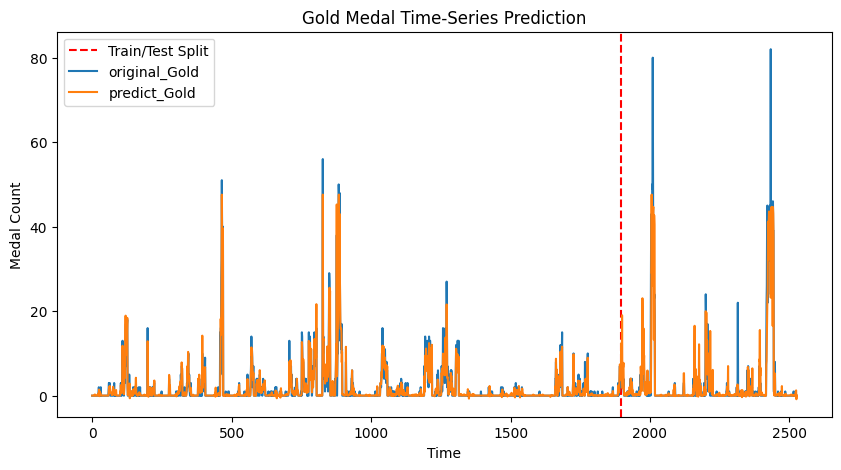

1


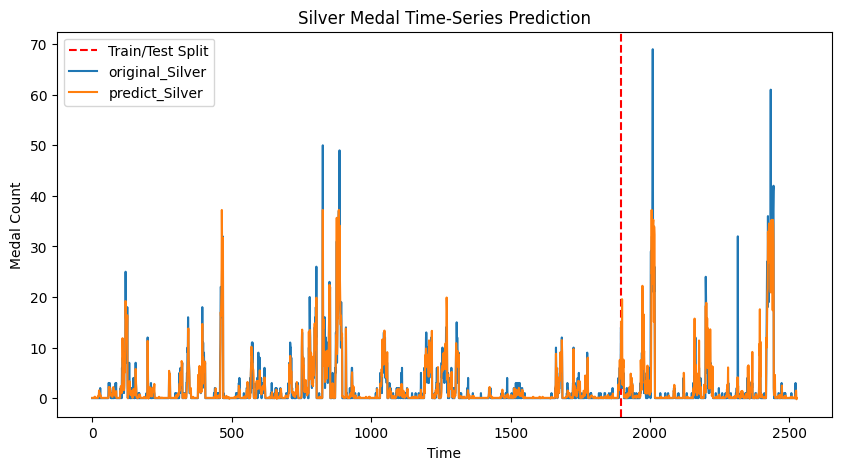

2


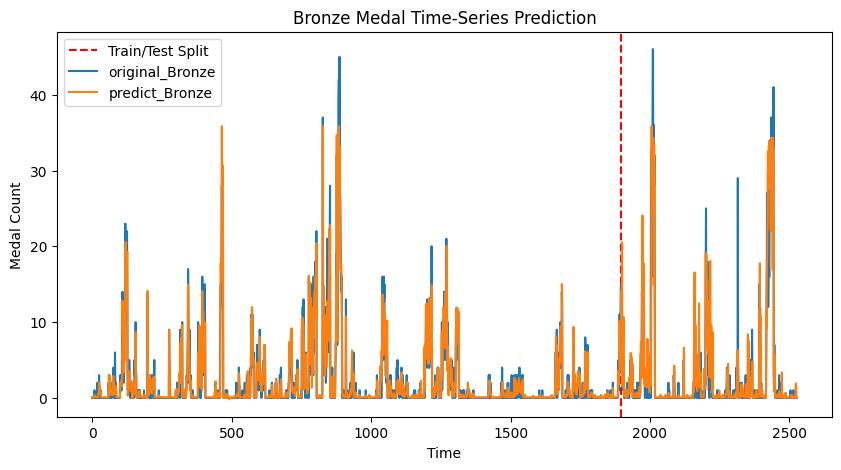

In [ ]:
# predict
#rnn.eval()
Y_predict = lstm(X_data)


Y_predict_n = Y_predict.data.cpu().numpy()
Y_data_n = Y_data.data.cpu().numpy()
from sklearn.metrics import mean_squared_error

mse_val = mean_squared_error(Y_predict_n, Y_data_n)

print('#### RMSE ####',np.sqrt(mse_val))

medals = ['Gold', 'Silver', 'Bronze']
for i, medal in enumerate(medals):
    plt.figure(figsize=(10, 5))
    plt.axvline(x=train_size, c='r', linestyle='--', label='Train/Test Split')

    # 실제 값과 예측 값을 개별적으로 플로팅
    print(i)
    plt.plot(Y_data_n[:, i], label=f'original_{medal}')
    plt.plot(Y_predict_n[:, i], label=f'predict_{medal}')

    plt.title(f'{medal} Medal Time-Series Prediction')
    plt.xlabel('Time')
    plt.ylabel('Medal Count')
    plt.legend(loc='best')
    plt.show()